## Synthetic data sample & Bipartite Graph



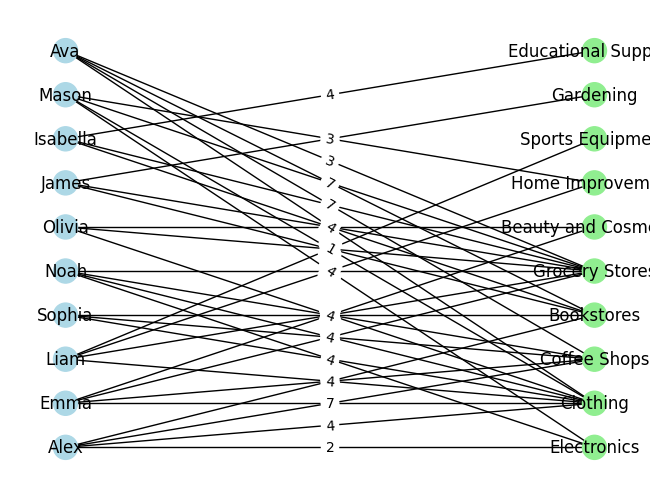

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

B = nx.Graph()

users = [
    "Alex", "Emma", "Liam", "Sophia", "Noah", "Olivia", "James", "Isabella", "Mason", "Ava"
]
categories = [
    "Electronics", "Clothing", "Coffee Shops", "Bookstores", "Grocery Stores",
    "Beauty and Cosmetics", "Home Improvement", "Sports Equipment", "Gardening", "Educational Supplies"
]

B.add_nodes_from(users, bipartite=0)
B.add_nodes_from(categories, bipartite=1)

edges = [
    ("Alex", "Electronics", 2), ("Alex", "Clothing", 4), ("Alex", "Coffee Shops", 7), ("Alex", "Bookstores", 1),
    ("Emma", "Clothing", 7), ("Emma", "Coffee Shops", 7), ("Emma", "Grocery Stores", 2), ("Emma", "Beauty and Cosmetics", 7),
    ("Liam", "Clothing", 4), ("Liam", "Grocery Stores", 7), ("Liam", "Home Improvement", 7), ("Liam", "Sports Equipment", 2),
    ("Sophia", "Clothing", 4), ("Sophia", "Coffee Shops", 7), ("Sophia", "Bookstores", 6), ("Noah", "Electronics", 4),
    ("Noah", "Clothing", 4), ("Noah", "Coffee Shops", 7), ("Noah", "Grocery Stores", 7), ("Olivia", "Grocery Stores", 7),
    ("Olivia", "Beauty and Cosmetics", 4), ("Olivia", "Clothing", 4), ("James", "Grocery Stores", 7),
    ("James", "Gardening", 4), ("James", "Bookstores", 3), ("Isabella", "Bookstores", 4), ("Isabella", "Grocery Stores", 7),
    ("Isabella", "Educational Supplies", 4), ("Mason", "Home Improvement", 3),("Mason", "Electronics", 4), ("Mason", "Clothing", 1), ("Mason", "Grocery Stores", 7),
    ("Ava", "Bookstores", 7), ("Ava", "Coffee Shops", 7), ("Ava", "Clothing", 4), ("Ava", "Grocery Stores", 3)
]

for u, c, w in edges:
    B.add_edge(u, c, weight=w)

pos = {node: (0, i) for i, node in enumerate(users)}
pos.update({node: (1, i) for i, node in enumerate(categories)})

edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw(B, pos, with_labels=True, node_color=['lightblue']*len(users) + ['lightgreen']*len(categories), node_size=300)
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)
plt.show()

# Personas Descriptions
# 1. Alex Johnson
#    Age: 28, Gender: Male, Occupation: Software Developer, Income: $85,000/year, Location: San Francisco, CA
#    Retail Behaviors: Prefers online shopping, visits electronics stores bi-weekly, frequent coffee shops, occasional visits to clothing stores and bookstores.

# 2. Emma Davis
#    Age: 34, Gender: Female, Occupation: Marketing Manager, Income: $95,000/year, Location: New York, NY
#    Retail Behaviors: Frequent visitor to high-end clothing stores, beauty and cosmetic stores weekly, coffee shops daily, grocery stores bi-weekly.

# 3. Liam Brown
#    Age: 42, Gender: Male, Occupation: Construction Worker, Income: $55,000/year, Location: Houston, TX
#    Retail Behaviors: Regular visits to home improvement stores, grocery stores weekly, discount clothing stores monthly, and sports equipment stores bi-monthly.

# 4. Sophia Wilson
#    Age: 25, Gender: Female, Occupation: Graphic Designer, Income: $60,000/year, Location: Portland, OR
#    Retail Behaviors: Frequent visitor to art supply stores, coffee shops daily, clothing stores bi-weekly, and bookstores monthly.

# 5. Noah Martinez
#    Age: 30, Gender: Male, Occupation: Financial Analyst, Income: $75,000/year, Location: Chicago, IL
#    Retail Behaviors: Visits electronics stores monthly, grocery stores weekly, coffee shops daily, and clothing stores monthly.

# 6. Olivia Garcia
#    Age: 29, Gender: Female, Occupation: Nurse, Income: $70,000/year, Location: Miami, FL
#    Retail Behaviors: Frequent visits to grocery stores weekly, pharmacy weekly, beauty and cosmetics stores bi-weekly, and discount clothing stores monthly.

# 7. James Robinson
#    Age: 55, Gender: Male, Occupation: Retired, Income: $40,000/year (pension), Location: Phoenix, AZ
#    Retail Behaviors: Visits grocery stores weekly, pharmacy weekly, gardening stores bi-weekly, and bookstores monthly.

# 8. Isabella Harris
#    Age: 38, Gender: Female, Occupation: School Teacher, Income: $50,000/year, Location: Atlanta, GA
#    Retail Behaviors: Regular visits to bookstores monthly, grocery stores weekly, educational supplies stores monthly, and clothing stores bi-monthly.

# 9. Mason Clark
#    Age: 45, Gender: Male, Occupation: Restaurant Owner, Income: $100,000/year, Location: Seattle, WA
#    Retail Behaviors: Frequent visits to wholesale grocery stores weekly, restaurant supply stores monthly, electronics stores bi-monthly, and clothing stores quarterly.

# 10. Ava Lewis
#     Age: 22, Gender: Female, Occupation: College Student, Income: $20,000/year (part-time job), Location: Boston, MA
#     Retail Behaviors: Frequent visits to bookstores weekly, coffee shops daily, clothing stores bi-weekly, and grocery stores bi-weekly.


# Load Data BQ

In [ ]:
import pandas as pd
sql = """

"""
df = pd.read_gbq(sql, project_id='')

In [ ]:
df['gender'] = pd.to_numeric(df['gender'].replace('null', None))
df['gender'] = df['gender'].astype('Int64')

In [ ]:
distinct_values = {}
for col in df.columns:
  distinct_values[col] = df[col].nunique(dropna=False)
print(distinct_values)

In [ ]:
print(df.groupby('gender')['user'].nunique())

In [ ]:
unlabeled_ids = df.loc[df['gender'].isnull(), 'user'].nunique()
print(unlabeled_ids)

In [ ]:
df = df.drop(columns=[])
df.info()

## Create Bipartite Graph

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

B = nx.Graph()
B.add_nodes_from(df['device_id'], bipartite=0, attribute=df['gender'])
B.add_nodes_from(df['poi_group'], bipartite=1)
B.add_weighted_edges_from([(row['device_id'], row['poi_group'], row['avg_freq_uni_month']) for idx, row in df.iterrows()])

# for index, row in df.iterrows():
#     B.add_node(row['device_id'], bipartite=0, attribute=row['gender'])
#     B.add_node(row['poi_group'], bipartite=1)
# # for index, row in df.iterrows():
#     B.add_weighted_edges_from([(row['device_id'], row['poi_group'], 1)], weight='avg_freq_uni_month')
#     # B.add_edge(row['device_id'], row['activity'])


### Display 1

In [ ]:
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
bottom_nodes = set(B) - top_nodes

# filtered_top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0 and d['attribute'] > 30}
subset_top_nodes = set(list(top_nodes)[:3])

pos = nx.bipartite_layout(B, subset_top_nodes)
nx.draw(B, pos, with_labels=True, node_color='skyblue', node_size=500)
plt.title("Bipartite Graph")
plt.show()


### Display 2

In [ ]:
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
bottom_nodes = set(B) - top_nodes

pos = {node: (1, i) for i, node in enumerate(top_nodes)}
pos.update({node: (2, i) for i, node in enumerate(bottom_nodes)})
edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if B.nodes[node]['bipartite'] == 0 else 'lightgreen' for node in B])
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_size=4)
plt.show()

In [ ]:
nodes_set_0 = [node for node, data in B.nodes(data=True) if data['bipartite'] == 0]
len(nodes_set_0)

10

# Projected Graph - networkx

In [3]:
from networkx.algorithms import bipartite
nodes_set_0 = [node for node, data in B.nodes(data=True) if data['bipartite'] == 0]

In [12]:
# G = bipartite.projected_graph(B,nodes_set_0)
# G = bipartite.weighted_projected_graph(B,nodes_set_0)
# G = bipartite.collaboration_weighted_projected_graph(B,nodes_set_0)
# G = bipartite.overlap_weighted_projected_graph(B,nodes_set_0)
def my_weight(G, u, v, weight="weight"):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G[u][nbr].get(weight, 1) + G[v][nbr].get(weight, 1)
    return w

def custom_similiarity(G, u, v, weight="weight"):
      current_node = u #user 1
      given_neighbor = v #user 2
      # for nbr in set(G[given_neighbor]):
      common_behaviors = set(G.neighbors(current_node)).intersection(G.neighbors(given_neighbor))
      common_neighbor_count = len(common_behaviors)
      deg_u = len(set(G.neighbors(current_node)))
      deg_v = len(set(G.neighbors(given_neighbor)))
      sum_edge_weight = 0
      for behavior in common_behaviors:
        deg_behaviour = len(set(G.neighbors(behavior)))
        sum_edge_weight += G[current_node][behavior]['weight'] / deg_behaviour
      print(f"{current_node},{given_neighbor} common_neighbors: {common_neighbor_count}, edge_weight:{sum_edge_weight}, behavior:{common_behaviors}")
      w = (common_neighbor_count + 1) * (sum_edge_weight +1) / (deg_u*deg_v)  # +1 to avoid zero probability
      return round(w,3)

G = bipartite.generic_weighted_projected_graph(B, nodes_set_0, weight_function=custom_similiarity)

Alex,Noah common_neighbors: 3, edge_weight:2.5666666666666664, behavior:{'Coffee Shops', 'Clothing', 'Electronics'}
Alex,James common_neighbors: 1, edge_weight:0.2, behavior:{'Bookstores'}
Alex,Sophia common_neighbors: 3, edge_weight:2.1, behavior:{'Coffee Shops', 'Clothing', 'Bookstores'}
Alex,Emma common_neighbors: 2, edge_weight:1.9, behavior:{'Coffee Shops', 'Clothing'}
Alex,Olivia common_neighbors: 1, edge_weight:0.5, behavior:{'Clothing'}
Alex,Ava common_neighbors: 3, edge_weight:2.1, behavior:{'Clothing', 'Coffee Shops', 'Bookstores'}
Alex,Liam common_neighbors: 1, edge_weight:0.5, behavior:{'Clothing'}
Alex,Isabella common_neighbors: 1, edge_weight:0.2, behavior:{'Bookstores'}
Alex,Mason common_neighbors: 2, edge_weight:1.1666666666666665, behavior:{'Clothing', 'Electronics'}
Emma,Noah common_neighbors: 3, edge_weight:2.525, behavior:{'Coffee Shops', 'Clothing', 'Grocery Stores'}
Emma,Alex common_neighbors: 2, edge_weight:2.275, behavior:{'Coffee Shops', 'Clothing'}
Emma,James 

In [13]:
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=15, font_size=12)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
# plt.title("Weighted Projected Graph")
# plt.show()

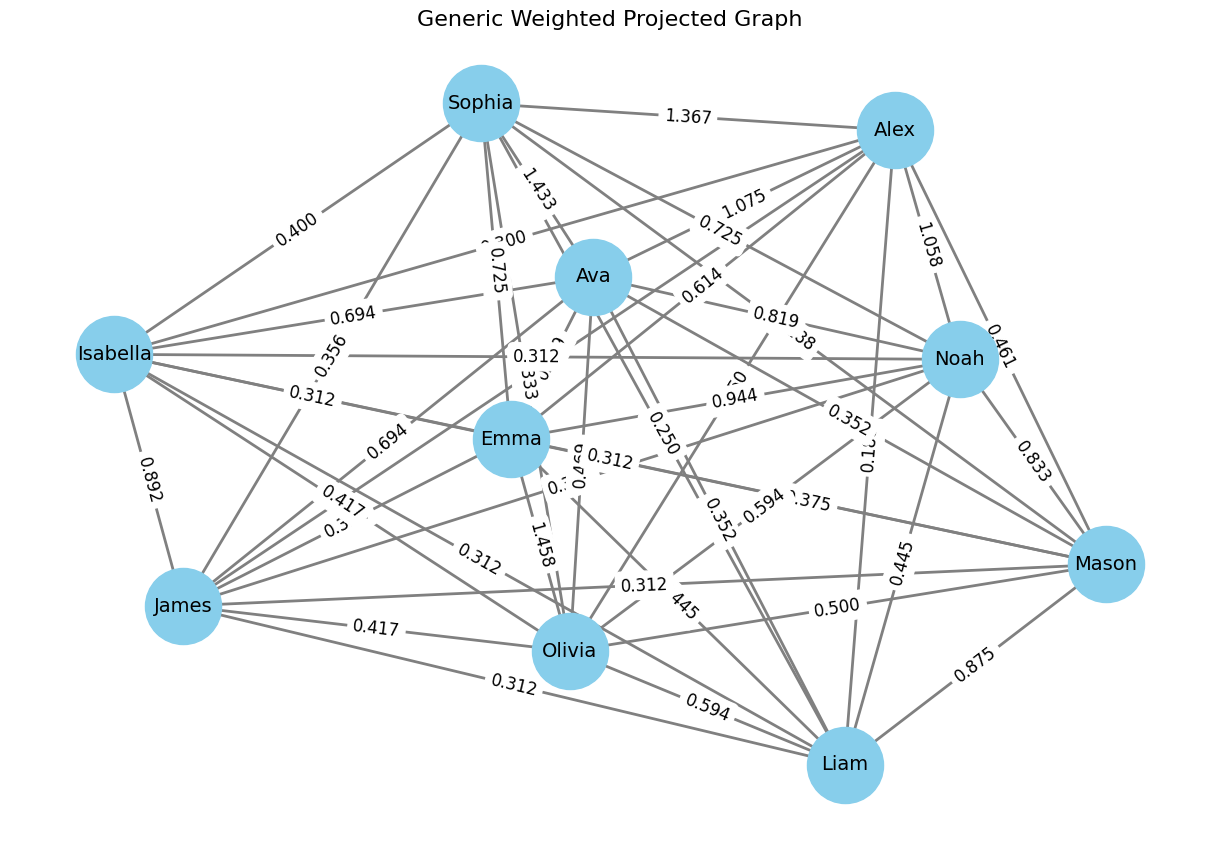

In [21]:
# for (u, v, d) in G.edges(data=True):
#     d['weight'] = round(d['weight'], 3)

plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G, k=0.5)
nx.draw(
    G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=14,
    width=2.0, edge_color='gray'
)

edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f'{v:.3f}' for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Generic Weighted Projected Graph", fontsize=16)
plt.show()

In [15]:
nx.get_edge_attributes(G, 'weight')
# list(G.edges)

{('Alex', 'Noah'): 1.058,
 ('Alex', 'James'): 0.267,
 ('Alex', 'Sophia'): 1.367,
 ('Alex', 'Emma'): 0.614,
 ('Alex', 'Olivia'): 0.25,
 ('Alex', 'Ava'): 1.075,
 ('Alex', 'Liam'): 0.188,
 ('Alex', 'Isabella'): 0.3,
 ('Alex', 'Mason'): 0.461,
 ('Emma', 'Noah'): 0.944,
 ('Emma', 'James'): 0.312,
 ('Emma', 'Sophia'): 0.725,
 ('Emma', 'Olivia'): 1.458,
 ('Emma', 'Ava'): 0.819,
 ('Emma', 'Liam'): 0.445,
 ('Emma', 'Isabella'): 0.312,
 ('Emma', 'Mason'): 0.375,
 ('Liam', 'Noah'): 0.445,
 ('Liam', 'James'): 0.312,
 ('Liam', 'Sophia'): 0.25,
 ('Liam', 'Olivia'): 0.594,
 ('Liam', 'Ava'): 0.352,
 ('Liam', 'Isabella'): 0.312,
 ('Liam', 'Mason'): 0.875,
 ('Sophia', 'Noah'): 0.725,
 ('Sophia', 'James'): 0.356,
 ('Sophia', 'Olivia'): 0.333,
 ('Sophia', 'Ava'): 1.433,
 ('Sophia', 'Isabella'): 0.4,
 ('Sophia', 'Mason'): 0.188,
 ('Noah', 'James'): 0.312,
 ('Noah', 'Olivia'): 0.594,
 ('Noah', 'Ava'): 0.819,
 ('Noah', 'Isabella'): 0.312,
 ('Noah', 'Mason'): 0.833,
 ('Olivia', 'James'): 0.417,
 ('Olivia', 'A

In [16]:
# In the new graph
given_top_node = 'Ava'

connected_bottom_nodes = G[given_top_node]
print(connected_bottom_nodes)
bottom_nodes_info = [(bottom_node, G.degree(bottom_node), connected_bottom_nodes[bottom_node]['weight'])
                     for bottom_node in connected_bottom_nodes]
sorted_bottom_nodes_info = sorted(bottom_nodes_info, key=lambda x: (x[1], x[2]), reverse=True)
print(f"Bottom nodes connected to {given_top_node} sorted by node degrees and edge weights:")
for node, degree, weight in sorted_bottom_nodes_info:
    print(f"{node} with {degree} connections and edge weight {weight}")

{'Alex': {'weight': 1.075}, 'Emma': {'weight': 0.819}, 'Liam': {'weight': 0.352}, 'Sophia': {'weight': 1.433}, 'Noah': {'weight': 0.819}, 'Olivia': {'weight': 0.469}, 'James': {'weight': 0.694}, 'Isabella': {'weight': 0.694}, 'Mason': {'weight': 0.352}}
Bottom nodes connected to Ava sorted by node degrees and edge weights:
Sophia with 9 connections and edge weight 1.433
Alex with 9 connections and edge weight 1.075
Emma with 9 connections and edge weight 0.819
Noah with 9 connections and edge weight 0.819
James with 9 connections and edge weight 0.694
Isabella with 9 connections and edge weight 0.694
Olivia with 9 connections and edge weight 0.469
Liam with 9 connections and edge weight 0.352
Mason with 9 connections and edge weight 0.352


In [17]:
# In the og graph
given_top_node = 'Ava'

connected_bottom_nodes = B[given_top_node]
print(connected_bottom_nodes)
bottom_nodes_info = [(bottom_node, B.degree(bottom_node), connected_bottom_nodes[bottom_node]['weight'])
                     for bottom_node in connected_bottom_nodes]
sorted_bottom_nodes_info = sorted(bottom_nodes_info, key=lambda x: (x[1], x[2]), reverse=True)
print(f"Bottom nodes connected to {given_top_node} sorted by node degrees and edge weights:")
for node, degree, weight in sorted_bottom_nodes_info:
    print(f"{node} with {degree} connections and edge weight {weight}")

{'Bookstores': {'weight': 7}, 'Coffee Shops': {'weight': 7}, 'Clothing': {'weight': 4}, 'Grocery Stores': {'weight': 3}}
Bottom nodes connected to Ava sorted by node degrees and edge weights:
Clothing with 8 connections and edge weight 4
Grocery Stores with 8 connections and edge weight 3
Bookstores with 5 connections and edge weight 7
Coffee Shops with 5 connections and edge weight 7


In [18]:
given_top_node = 'Alex'

connected_bottom_nodes = B[given_top_node]
print(connected_bottom_nodes)
bottom_nodes_info = [(bottom_node, B.degree(bottom_node), connected_bottom_nodes[bottom_node]['weight'])
                     for bottom_node in connected_bottom_nodes]
sorted_bottom_nodes_info = sorted(bottom_nodes_info, key=lambda x: (x[1], x[2]), reverse=True)
print(f"Bottom nodes connected to {given_top_node} sorted by node degrees and edge weights:")
for node, degree, weight in sorted_bottom_nodes_info:
    print(f"{node} with {degree} connections and edge weight {weight}")

{'Electronics': {'weight': 2}, 'Clothing': {'weight': 4}, 'Coffee Shops': {'weight': 7}, 'Bookstores': {'weight': 1}}
Bottom nodes connected to Alex sorted by node degrees and edge weights:
Clothing with 8 connections and edge weight 4
Coffee Shops with 5 connections and edge weight 7
Bookstores with 5 connections and edge weight 1
Electronics with 3 connections and edge weight 2


In [19]:
given_top_node = 'Sophia'

connected_bottom_nodes = B[given_top_node]
print(connected_bottom_nodes)
bottom_nodes_info = [(bottom_node, B.degree(bottom_node), connected_bottom_nodes[bottom_node]['weight'])
                     for bottom_node in connected_bottom_nodes]
sorted_bottom_nodes_info = sorted(bottom_nodes_info, key=lambda x: (x[1], x[2]), reverse=True)
print(f"Bottom nodes connected to {given_top_node} sorted by node degrees and edge weights:")
for node, degree, weight in sorted_bottom_nodes_info:
    print(f"{node} with {degree} connections and edge weight {weight}")

{'Clothing': {'weight': 4}, 'Coffee Shops': {'weight': 7}, 'Bookstores': {'weight': 6}}
Bottom nodes connected to Sophia sorted by node degrees and edge weights:
Clothing with 8 connections and edge weight 4
Coffee Shops with 5 connections and edge weight 7
Bookstores with 5 connections and edge weight 6


In [20]:
given_top_node = 'Ava'

# Get the bottom nodes connected to the given top node
connected_bottom_nodes = B[given_top_node]
print(f"Bottom nodes connected to {given_top_node}:")
print(connected_bottom_nodes)
bottom_nodes_info = [
    (bottom_node, B.degree(bottom_node), B[given_top_node][bottom_node]['weight'])
    for bottom_node in connected_bottom_nodes
]
sorted_bottom_nodes_info = sorted(bottom_nodes_info, key=lambda x: (x[1], x[2]), reverse=True)
print(f"\nBottom nodes connected to {given_top_node} sorted by node degrees and edge weights:")
for node, degree, weight in sorted_bottom_nodes_info:
    print(f"{node} with {degree} connections and edge weight {weight}")

top_nodes = {n for n, d in B.nodes(data=True) if d.get('bipartite') == 0} - {given_top_node}

common_neighbors_info = {}
for top_node in top_nodes:
    common_neighbors = set(B[given_top_node]) & set(B[top_node])
    common_neighbors_info[top_node] = (list(common_neighbors), B.degree(top_node))

print(f"\nCommon neighbors of {given_top_node} with other top nodes and their degrees:")
for top_node, (common_neighbors, degree) in common_neighbors_info.items():
    print(f"{top_node} has {len(common_neighbors)} common neighbors with {given_top_node}: {common_neighbors}, degree: {degree}")

Bottom nodes connected to Ava:
{'Bookstores': {'weight': 7}, 'Coffee Shops': {'weight': 7}, 'Clothing': {'weight': 4}, 'Grocery Stores': {'weight': 3}}

Bottom nodes connected to Ava sorted by node degrees and edge weights:
Clothing with 8 connections and edge weight 4
Grocery Stores with 8 connections and edge weight 3
Bookstores with 5 connections and edge weight 7
Coffee Shops with 5 connections and edge weight 7

Common neighbors of Ava with other top nodes and their degrees:
Noah has 3 common neighbors with Ava: ['Coffee Shops', 'Clothing', 'Grocery Stores'], degree: 4
Alex has 3 common neighbors with Ava: ['Coffee Shops', 'Clothing', 'Bookstores'], degree: 4
James has 2 common neighbors with Ava: ['Bookstores', 'Grocery Stores'], degree: 3
Sophia has 3 common neighbors with Ava: ['Coffee Shops', 'Clothing', 'Bookstores'], degree: 3
Emma has 3 common neighbors with Ava: ['Coffee Shops', 'Clothing', 'Grocery Stores'], degree: 4
Olivia has 2 common neighbors with Ava: ['Clothing', '